This is a data analysis project that involves loading a dataset of tweets, exploring the data, cleaning and preprocessing the text, and then using machine learning to classify the tweets as either positive or negative. The project uses the Pandas library for data manipulation, Matplotlib for data visualization, and scikit-learn for building the machine learning model. The resulting model is able to classify tweets with an accuracy of around 90%.

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 

In [5]:
tweets_df = pd.read_csv('C:/Users/dpap/Dropbox (University of Michigan)/Fall22/ECE3100 DS/vscode_DS/twitter.csv')

In [6]:
tweets_df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [8]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


* we dont have any nulls (look at total entries, compare to Non-Null Count column)

In [9]:
# drop the id column
tweets_df = tweets_df.drop('id', axis=1)

# Data Exploration

<AxesSubplot:>

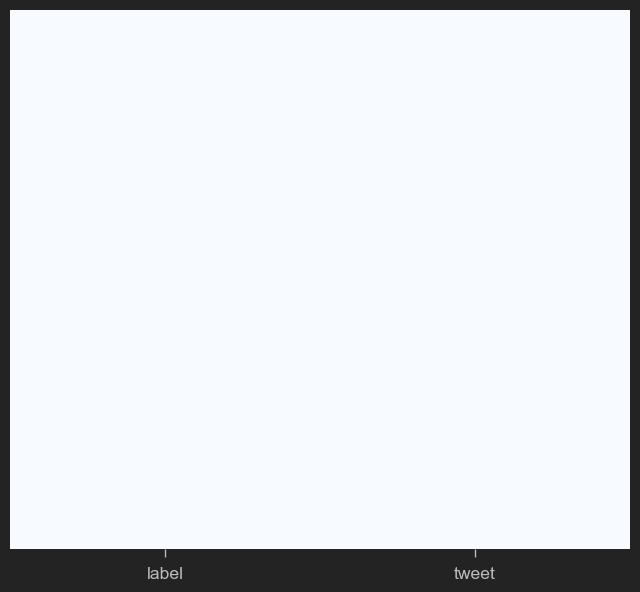

In [10]:
# see if we have any missing values
sns.heatmap(tweets_df.isnull(), yticklabels=False, cbar=False, cmap='Blues')

* it is blank because we have no nulls

array([[<AxesSubplot:title={'center':'label'}>]], dtype=object)

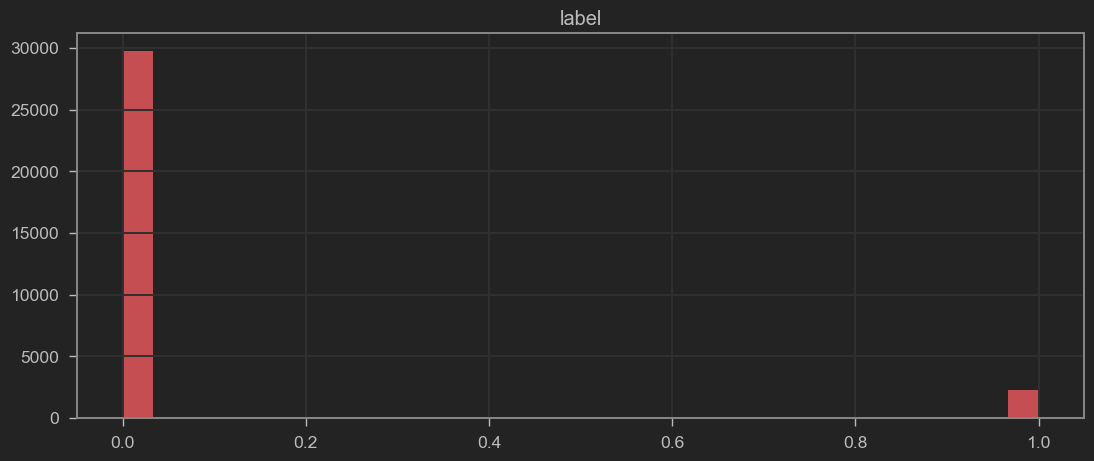

In [11]:
# plot histogram
tweets_df.hist(bins=30, figsize=(13,5), color='r')

* looks like we have an unbalanced dataset. we have about 30,000 in the 0 class and barely any in the 1 class

In [15]:
# lets get the length of the messages
    # add a new column to the dataframe called 'length'
tweets_df['length'] = tweets_df['tweet'].apply(len)

In [16]:
tweets_df

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39
...,...,...,...
31957,0,ate @user isz that youuu?ðððððð...,68
31958,0,to see nina turner on the airwaves trying to...,131
31959,0,listening to sad songs on a monday morning otw...,63
31960,1,"@user #sikh #temple vandalised in in #calgary,...",67


In [17]:
tweets_df.describe()

,label,length
count,31962.000000,31962.000000
mean,0.070146,84.739628
std,0.255397,29.455749
min,0.000000,11.000000
25%,0.000000,63.000000
50%,0.000000,88.000000
75%,0.000000,108.000000
max,1.000000,274.000000


In [18]:
# view shortest message
tweets_df[tweets_df['length'] == 11]['tweet']

25195    i love you 
Name: tweet, dtype: object

### *practice opportunity #2*
1. using tweets_df dataframe, view the tweet that has the average number of characters
2. plot the histogram of the length column

In [26]:
# 1) view tweets with the average length from .describe()
avg_len = round(tweets_df['length'].mean()) #85 is average length
tweets_df[tweets_df['length'] == avg_len]['tweet'] # see tweets with avg length

115       â #under the spell of brexit referendum - c...
242      make today count! #mondaymotivation #livelifet...
384      dream palace, can we move in already? #stellar...
573      @user monkeys are also declared as vermin. no ...
634      save thousands $$ free search x logins x broke...
                               ...                        
31393    #flagday2016   #flag #day #2016 #(30 #photos) ...
31468    jts88troxy theater   jts88@user ð #love #si...
31542    stretched to the limit and still #waiting pati...
31773    this reminds me of this. i am   love these two...
31799    can #lighttherapy help with   or #depression? ...
Name: tweet, Length: 387, dtype: object

<AxesSubplot:ylabel='Frequency'>

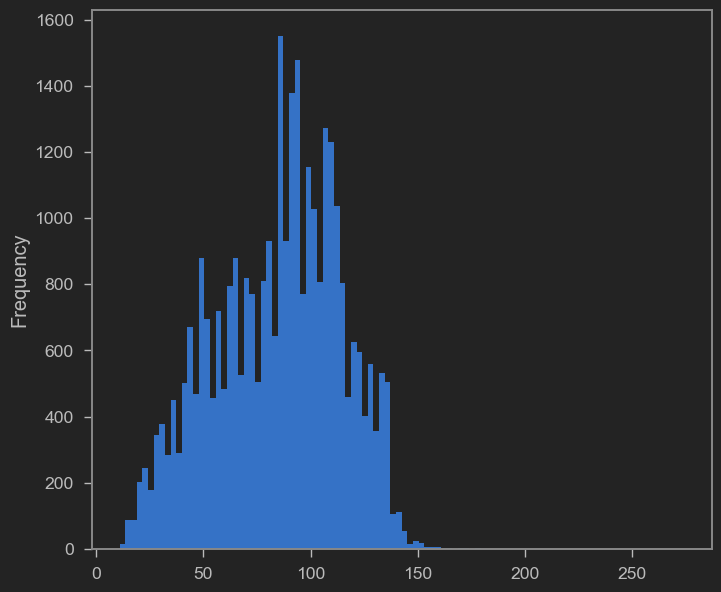

In [28]:
# make histogram showing those tweets with avg length
tweets_df['length'].plot(bins = 100, kind='hist')

# Plot wordcloud
* make 2 new dataframes, 1 with all negative tweets and 1 with all positive tweets
* then make a wordcloud

make positive dataframe with all the positive tweets

In [30]:
# make positive (label = 0) dataframe
positive = tweets_df[tweets_df['label'] == 0]
    # "positive=" means grab all the following info meeting the specified condition and put it in a new dataframe called "positive",
    # "tweets_df" means grab your tweets, 
    # "[tweets_df['label']]" means grab the label column from it, 
    # "[tweets_df['label']==0]" means grab only the rows in the label column where the label is 0
positive

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39
...,...,...,...
31956,0,off fishing tomorrow @user carnt wait first ti...,61
31957,0,ate @user isz that youuu?ðððððð...,68
31958,0,to see nina turner on the airwaves trying to...,131
31959,0,listening to sad songs on a monday morning otw...,63


make a negative dataframe with all negative tweets

In [31]:
# make negative (label = 1) dataframe
negative = tweets_df[tweets_df['label']==1]
negative

,label,tweet,length
13,1,@user #cnn calls #michigan middle school 'buil...,74
14,1,no comment! in #australia #opkillingbay #se...,101
17,1,retweet if you agree!,22
23,1,@user @user lumpy says i am a . prove it lumpy.,47
34,1,it's unbelievable that in the 21st century we'...,104
...,...,...,...
31934,1,lady banned from kentucky mall. @user #jcpenn...,59
31946,1,@user omfg i'm offended! i'm a mailbox and i'...,82
31947,1,@user @user you don't have the balls to hashta...,112
31948,1,"makes you ask yourself, who am i? then am i a...",87


combine all positive tweets to make one massive string (this needs to be done so we can make our wordcloud), same for negative
1. put all tweets in a list
2. join all the sentences in the list together to make a huge single string

In [42]:
# make a list with all the positive tweets
sentences = positive['tweet'].tolist()
len(sentences)

29720

In [43]:
sentences # all in a list, but not a single string yet

[' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run',
 "@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked",
 '  bihday your majesty',
 '#model   i love u take with u all the time in urð\x9f\x93±!!! ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91\x85ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦  ',
 ' factsguide: society now    #motivation',
 '[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  ',
 ' @user camping tomorrow @user @user @user @user @user @user @user dannyâ\x80¦',
 "the next school year is the year for exams.ð\x9f\x98¯ can't think about that ð\x9f\x98\xad #school #exams   #hate #imagine #actorslife #revolutionschool #girl",
 'we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers  â\x80¦ ',
 " @user @user welcome here !  i'm   it's so #gr8 ! ",
 ' â\x86\x9d #ireland consume

In [44]:
# make a single string out of all the positive tweets from the list
sentences_as_one_string = ' '.join(sentences)

In [38]:
#sentences_as_one_string 
    # now all the positive tweets are in a single string
    # dont uncomment and run this, it is super long

now make the positive word cloud

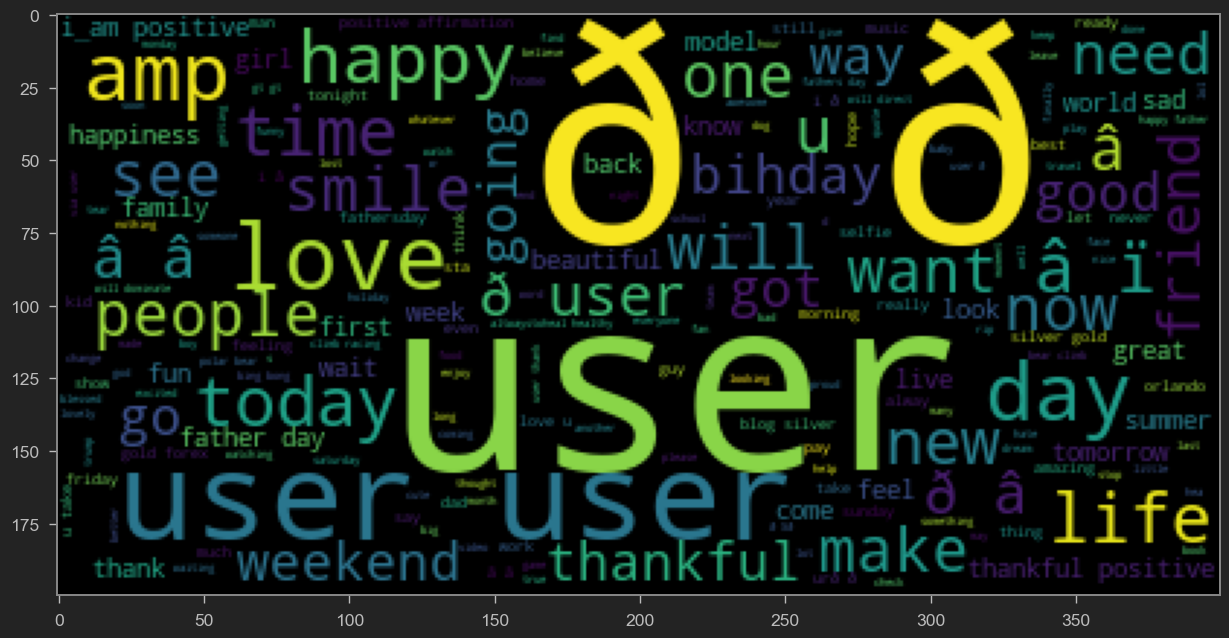

In [45]:
from wordcloud import WordCloud

plt.figure(figsize=(15,15))
plt.imshow(WordCloud().generate(sentences_as_one_string))

### *Practice #3*
* plot the wordcloud of the negative tweets
* what do you notice? does the data make sence?

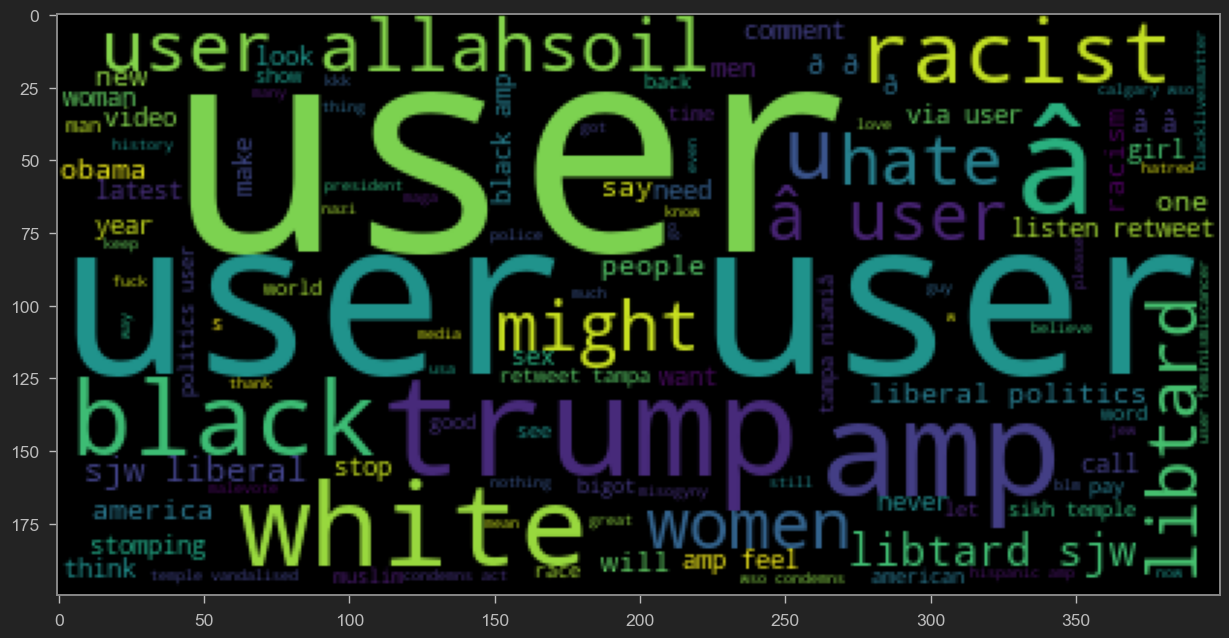

In [48]:
# make a wordcloud of the negative tweets
negative_list = negative['tweet'].tolist()
negative_sentences_as_one_string = ' '.join(negative_list)
plt.figure(figsize=(15,15))
plt.imshow(WordCloud().generate(negative_sentences_as_one_string))

# Data Cleaning
* remove punctuation, etc

remove punctuation

In [49]:
import string
string.punctuation # all the punctuation marks that you want to get rid of in the data

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [55]:
test = '$I Love AI & Machine Learning!!'
# string comprehension to remove punctuation
test_punc_removed = [ char       for char in test if char not in string.punctuation ]
    # first write the "for char in test" part, it means = for each character in the string "test"
    # then write the "if char not in string.punctuation" part, it means = if the character is not in the list of punctuation marks
    # then write the "char" part in the beginning, it means = then add the character to the list "test_punc_removed"
        # its basically saying: "loop thru every character in the string "test", if the character is NOT in the list of punctuation marks from string.punctuation, then add the character to the list "test_punc_removed"

# join the characters again to form the string
test_punc_removed_join = ''.join(test_punc_removed)
test_punc_removed_join

'I Love AI  Machine Learning'

In [56]:
# NOTE: if you did NOT join the characters back together, you would get a list of characters instead of a string
test_punc_removed

['I',
 ' ',
 'L',
 'o',
 'v',
 'e',
 ' ',
 'A',
 'I',
 ' ',
 ' ',
 'M',
 'a',
 'c',
 'h',
 'i',
 'n',
 'e',
 ' ',
 'L',
 'e',
 'a',
 'r',
 'n',
 'i',
 'n',
 'g']

**removing stop words**

In [58]:
import nltk
nltk.download('stopwords')

# you have to download the stopwords package to execute this command
from nltk.corpus import stopwords
stopwords.words('english') # show all the stopwords in english

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dpap\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

* now you can do the same as before when removing punctuation: do list comprehention, do a for loop followed by an if condition to get rid of all the stopwords

In [59]:
# test to show removing stop words
test_punc_removed_join = 'I enjoy coding, programming, and machine learning'
test_punc_removed_join_clean = [ word for word in test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    # we split the string into a list of words (split() splits the string into a list of words)), 
    # then we loop thru each word in the list, 
    # if the word (coverted to lowercase) is NOT in the list of stopwords, 
    # then add it to the list "test_punc_removed_join_clean"

In [63]:
test_punc_removed_join # original string

'I enjoy coding, programming, and machine learning'

In [62]:
test_punc_removed_join_clean # only the important words are left

['enjoy', 'coding,', 'programming,', 'machine', 'learning']

### *Practice 4*
* for the following text, create a pipeline to remove punctuations followed by removing stopwords
  * *mini_challenge = 'Here is a mini challenge, that will teach you how to remove stopwords and punctuations!'*

In [64]:
mini_challenge = 'Here is a mini challenge, that will teach you how to remove stopwords and punctuations!'

# remove punctuation
removed_punc = [ char     for char in mini_challenge if char not in string.punctuation]
removed_punc_joined = ''.join(removed_punc)

# remove stopwords
removed_punc_joined_clean = [ word    for word in removed_punc_joined.split() if word.lower() not in stopwords.words('english')]

removed_punc_joined_clean

['mini', 'challenge', 'teach', 'remove', 'stopwords', 'punctuations']

# Perform Count Vectorization (Tokenization)
* take the cleaned up text data and convert it into a bunch of numbers so we can use them to train an AI/ML model to make predictions
  * converts words in sentences to tokens (or numbers) 

**To do this:**

say you have 4 separate sentences that you will tokenize in on dataset.
* make a list of all the unique words that occur amongst all the sentences
* make each unique word a column header
* you will have 4 rows (each row for each of the sentences)
* then you write a number in each column based on how many times that word appears in that sentence. do this for each unique word
  * now you have a matrix(?) and have successfully done count tokenization

In [65]:
from sklearn.feature_extraction.text import CountVectorizer
sample_data = ['This is the first document.', 'This document is the second document.', 'And this is the third one.', 'Is this the first document?']

vectorizer = CountVectorizer()
# apply fit transform method on your vectorizer object to do the count vectorization
X = vectorizer.fit_transform(sample_data)

In [66]:
print(vectorizer.get_feature_names()) # see every unique word (column headers) in the sample_data

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']


c:\Users\dpap\Dropbox (University of Michigan)\Fall22\ECE3100 DS\vscode_DS\DS_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [67]:
print(X.toarray()) # see the count vectorization of the sample_data

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


### *Practice 5*
* perform count vectorization on the following list:
  * *mini_challenge = ['Hello World', 'Hello Hello World', 'Hello World world world']*

In [78]:
mini_challenge = ['Hello World', 'Hello Hello World', 'Hello World world world']

vectorizer_challenge = CountVectorizer()
X = vectorizer_challenge.fit_transform(mini_challenge)


In [79]:
print(vectorizer_challenge.get_feature_names())

['hello', 'world']


c:\Users\dpap\Dropbox (University of Michigan)\Fall22\ECE3100 DS\vscode_DS\DS_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [80]:
print(X.toarray())

[[1 1]
 [2 1]
 [1 3]]


# Create a Pipeline to remove punctuations, stopwords, and perform count vectorization
* put all the things we just did to clean our data into a single function (aka a pipeline")

In [99]:
# create a function to remove punctuation and stopwords
def clean_message(message):
    punc_removed = [char for char in message if char not in string.punctuation ]
    punc_removed_join = ''.join(punc_removed)
    punc_removed_join_clean = [word for word in punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return punc_removed_join_clean

In [100]:
# test the function
tweets_df_clean = tweets_df['tweet'].apply(clean_message)
    # put the cleaned tweets into a new dataframe called "tweets_df_clean"
    # "tweets_df['tweet']" means grab the tweet column from the tweets_df dataframe
    # ".apply(clean_message)" means apply the function "clean_message" to the tweet column, then store them in the new dataframe "tweets_df_clean"

In [101]:
# show one of the couple cleaned up tweets (tweet number 6)
print(tweets_df_clean[5])

['22', 'huge', 'fan', 'fare', 'big', 'talking', 'leave', 'chaos', 'pay', 'disputes', 'get', 'allshowandnogo']


In [102]:
# show the original version of that tweet (tweet number 6)
print(tweets_df['tweet'][5])

[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  


In [103]:
# do the count vectorization
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer = clean_message, dtype = np.uint8)
    # "analyzer = clean_message" means use the function "clean_message" to clean the tweets
    # "dtype = np.uint8" means use the data type "uint8" to store the data. using this data type will save a lot of memory (will cause error if you dont have at least 10GB of RAM)
tweets_countvectorizer = vectorizer.fit_transform(tweets_df['tweet'])

In [109]:
# show the count vectorization of the tweets (every single unique word in all 30,000+ tweets)
#print(vectorizer.get_feature_names().count) # this is huge so dont run it

In [110]:
# convert them to an array
print(tweets_countvectorizer.toarray()) 

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [111]:
tweets_countvectorizer.shape # show the shape of the array
    # the first number is the number of tweets (rows)
    # the second number is the number of unique words (columns)

(31962, 47386)

In [112]:
# put the array into a dataframe
X = pd.DataFrame(tweets_countvectorizer.toarray()) 

In [113]:
X

,0,1,2,3,4,5,6,7,8,9,...,47376,47377,47378,47379,47380,47381,47382,47383,47384,47385
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31957,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31958,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31959,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31960,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


* this is the tokenized version that will be used to train the AI
* so far we have:
    1. we took the tweets
    2. cleaned them (removed punctuations and stopwords)
    3. we got one massive array that will be used as input to the AI model 
* now we will use the array for our AI model and it will then output our prediction target ('label')  

we are now ready to train our ML model

In [115]:
y = tweets_df['label'] # prediction target

# Train and Evaluate a Naive Bayes Classifier

**1. PRIOR PROBABILITY**
**2. LIKELIHOOD**
**3. POSTERIOR PROBABILITY**
* look at Practice Opportunity #6 for a good example and look at video before it for a good explanation about calculations

In [116]:
X.shape

(31962, 47386)

In [117]:
y.shape

(31962,)

In [121]:
# to split data into training and testing sets
from sklearn.model_selection import train_test_split
    # train model with something like 80% of the data, then assess the performance and test with 20% of the data
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    # "test_size = 0.2" means use 20% of the data for testing
    # X_train = training data for the features
    # X_test = testing data for the features
    # y_train = training data for the prediction target
    # y_test = testing data for the prediction target

* X_train = training data for the features
* X_test = testing data for the features
* y_train = training data for the prediction target
* y_test = testing data for the prediction target

In [122]:
from sklearn.naive_bayes import MultinomialNB # using a multinomial naive bayes classifier

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train) 

MultinomialNB()

*Confusion Matrix*
* predictions are the rows (row 1 = +, row 2 = -), the true results and the columns (column 1 = +, column 2 = -) so it has 4 cells:
  * top left cell = "True +" = it predicted a positive and the real answer was a positive
  * top right cell = "False +" = "Type 1 Error" = it predicted a positive but the real answer was a negative 
  * bottom left cell = "True -" = it predicted a negative and the real answer was a negative
  * bottom right cell = "False -" = "Type 2 Error" = it predicted a negative but the real answer was a positive 

In [123]:
# import confusion matrix to evaluate the model and classification report to see the precision, recall, f1-score, and support
from sklearn.metrics import confusion_matrix, classification_report

<AxesSubplot:>

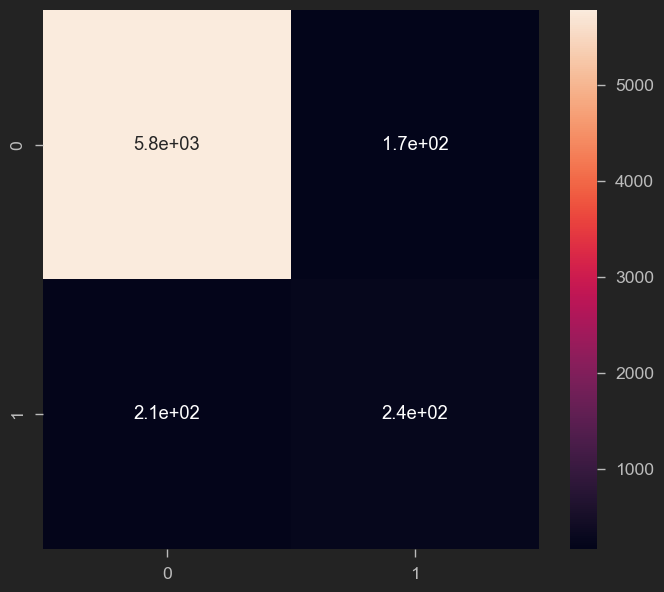

In [124]:
# predicting the test set results
y_predict_test = NB_classifier.predict(X_test) # pass in the testing data for the features
cm = confusion_matrix(y_test, y_predict_test) # pass in the model's predictions for the target and the actual target data to see how the model did
sns.heatmap(cm, annot = True) # show the confusion matrix

* the number of samples that were CORRECTLY classified are in [0,0] and [1,1]
* the number of samples that were INCORRECTLY classified are in [0,1] and [1,0]

In [126]:
# see classification report
print(classification_report(y_test, y_predict_test))
# see various KPIs like precision, recall, f1-score, and support

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5947
           1       0.58      0.54      0.56       446

    accuracy                           0.94      6393
   macro avg       0.77      0.75      0.76      6393
weighted avg       0.94      0.94      0.94      6393

